In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('nigeria_7_conditions_dataset.csv')
df

,Fever,Headache,Chills,Fatigue,Muscle_Ache,Dry_Cough,Productive_Cough,Shortness_of_Breath,Chest_Pain,Diarrhea,Abdominal_Pain,Nausea,Vomiting,Loss_of_Appetite,Rash,Runny_Nose,Sore_Throat,Red_Eyes,Diagnosis
0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,Malaria
1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,Malaria
2,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,1,Lassa_Fever
3,1,1,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,Malaria
4,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,Measles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,Malaria
24996,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,Influenza
24997,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,Measles
24998,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,0,Pneumonia


In [9]:
df.isnull().sum()

Fever                  0
Headache               0
Chills                 0
Fatigue                0
Muscle_Ache            0
Dry_Cough              0
Productive_Cough       0
Shortness_of_Breath    0
Chest_Pain             0
Diarrhea               0
Abdominal_Pain         0
Nausea                 0
Vomiting               0
Loss_of_Appetite       0
Rash                   0
Runny_Nose             0
Sore_Throat            0
Red_Eyes               0
Diagnosis              0
dtype: int64

In [10]:
# model training
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

X, y

(       Fever  Headache  Chills  Fatigue  Muscle_Ache  Dry_Cough  \
 0          1         1       1        1            1          0   
 1          1         1       0        1            1          0   
 2          1         1       0        1            0          1   
 3          1         1       1        1            1          0   
 4          1         1       0        1            1          1   
 ...      ...       ...     ...      ...          ...        ...   
 24995      1         0       1        1            1          0   
 24996      1         1       1        1            1          1   
 24997      1         1       0        1            0          1   
 24998      1         1       1        1            0          1   
 24999      1         1       0        1            0          1   
 
        Productive_Cough  Shortness_of_Breath  Chest_Pain  Diarrhea  \
 0                     0                    0           0         0   
 1                     0                

In [11]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

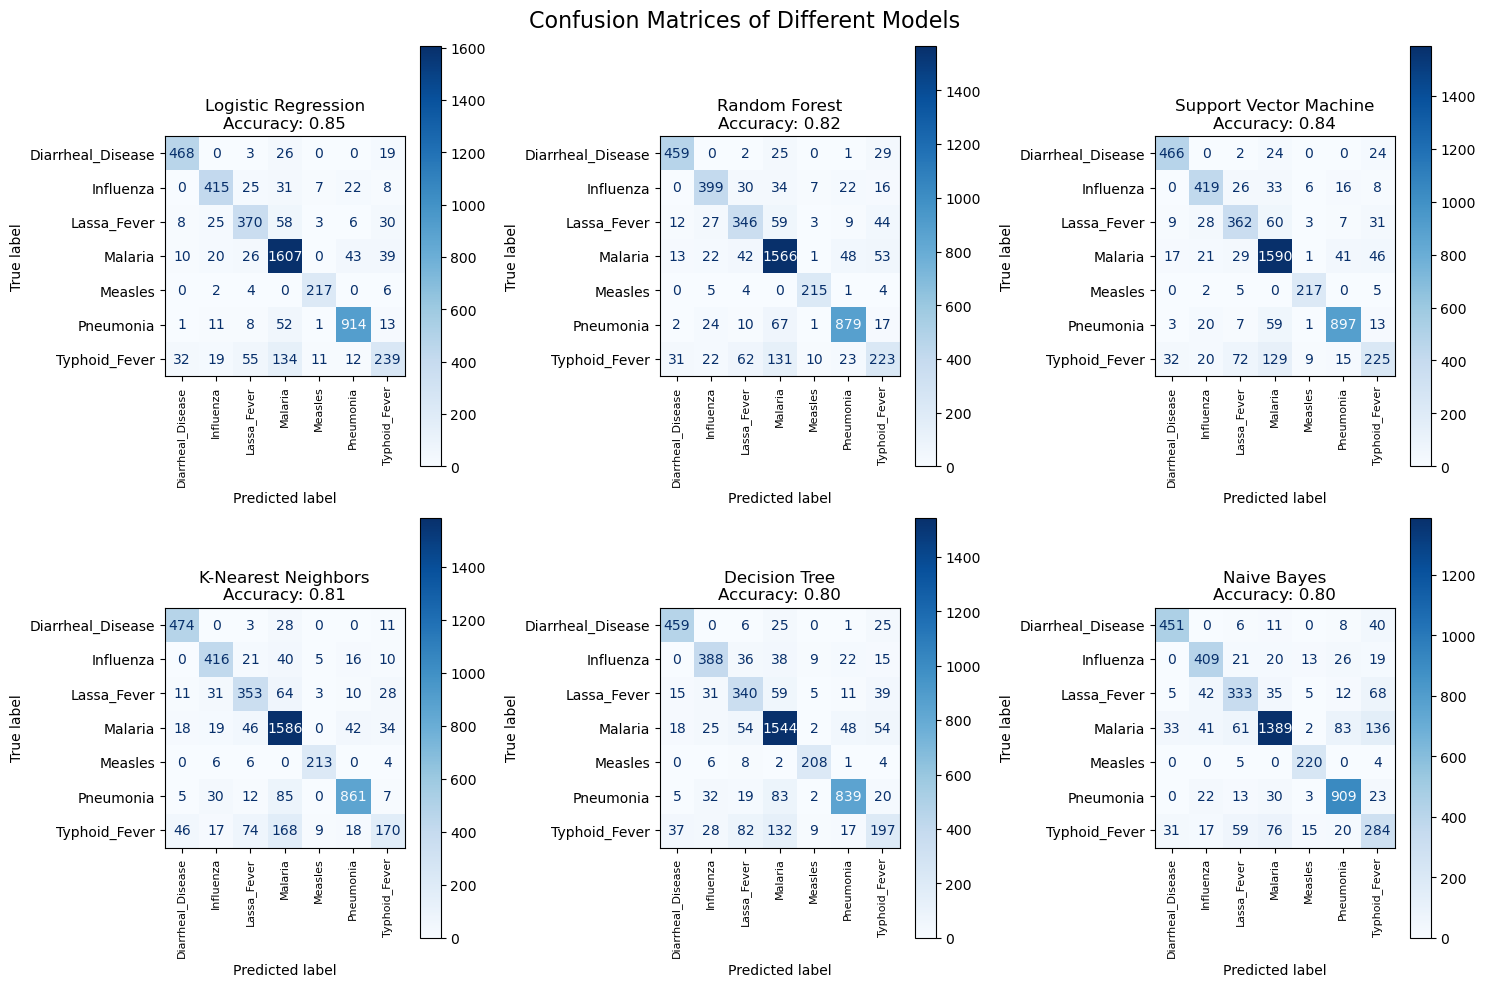

In [21]:
#Training and evaluating multiple models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 6 models → 2 rows × 3 columns

for ax, (model_name, model) in zip(axes.ravel(), models.items()):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", values_format='d', ax=ax, colorbar=True, xticks_rotation='vertical')
    ax.tick_params(axis='x', labelsize=8)
    fig.tight_layout(pad=3.0)
    ax.set_title(f"{model_name}\nAccuracy: {acc:.2f}")

plt.suptitle("Confusion Matrices of Different Models", fontsize=16)
plt.tight_layout()
plt.show()


In [20]:
fig.savefig('model_comparison_confusion_matrices.png')